# TF-IDF BASED AND K-MEAN CLUSTURING BASED  PAGE RANKING ALGORITHMS

### READING DATASET AND SAVING IT INTO A DOCS LIST 

In [2]:
import os
import nltk

In [50]:
cd "\dataset" 

E:\dataset


In [5]:
dataset_name=os.listdir()

docs = [] 
for i in range(len(dataset_name)):
    f=open(dataset_name[i],"r");
    docs.append(f.read())
    f.close()

### Saving queries into querys list

In [6]:
querys=['information regarding timeshare resales', 'humans responded respond appearance coyotes urban suburban areas', 'locate past present model railroad layouts', 'methods control type ii diabetes', 'jobs outsourced india', 'describe work home scams promoted internet', 'state kyrgyzstan united states relations', 'relationship seminole indians florida', 'describe origin nature extent spread means controlling kudzu', 'describe evidence heredity play role obesity']

## TASK1

### Creating term frequency vectors for each document in docs

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')

vectorized_corpus = cv.fit_transform(docs).toarray()

### Saving the vocabulary of the dataset into vocabulary variable.

In [8]:
vocabulary=cv.vocabulary_

### Function to calculate the cosine similarity with all document vectors:

    This function takes a query vector as in input and calculate the cosine similarity of that query vector to all docs in the dataset and return a list of all cosine similarity of that query with complete documents in docs.

In [9]:
import numpy as np
def cos_similarity(vector):
    result=[]
    for i in range(len(docs)):
        dot = np.dot(vectorized_corpus[i],vector)
        norma = np.linalg.norm(vectorized_corpus[i])
        normb = np.linalg.norm(vector)
        cos = dot / (norma * normb)
        result.append(cos)
    return result   

### Calculating the cosine similarity of each query:

   * Result_similarities is the list we using to save the result.
   * Taking a zero vector "VECTOR" of size of vocabulary of dataset
   * For every term in the query we increse the frequecy of the term in the vector using the term index in vectorized_corpususing "vocabulary".

In [10]:
result_similarities=[]
for q in querys:
    vector=np.zeros(len(vectorized_corpus[0]))
    for i in q.split(" "):
        i=i.lower()
        if i in vocabulary:
            vector[vocabulary[i]]+=1
    result_similarities.append(cos_similarity(vector))

* Appending the results with there respective document ID and 

In [11]:
result_new_similarities=[]
for i in range(len(result_similarities)):
    doc_dict={}
    for j in range(len(result_similarities[i])):
        doc_dict[j]=result_similarities[i][j]
    result_new_similarities.append(doc_dict)
    result_new_similarities[i]=sorted(result_new_similarities[i].items(), key =lambda kv:(kv[1], kv[0]),reverse=True)

In [12]:
number_of_relevant_documents=[1,3,1,1,1,1,2,1,1,1] #each element with index i represents number 
                                                                #of relevant documents present for each i+1th Query
relevant_documents_id=[[43], [76, 92, 48], [67], [38], [61], [77], [44, 51], [37], [63], [17]]

In [13]:
precision_with_ranking=[]
fifth_level_precision=[]
tenth_level_precision=[]
fifth_level_recall=[]
tenth_level_recall=[]
recall_with_ranking=[]
k=1
for i in result_new_similarities:
    ten_precison=0.0
    five_precison=0.0
    fifteen_precison=0.0
    five_recall=0.0
    ten_recall=0.0
    fifteen_recall=0.0
    retrived_documents=0
    relevant_retrieved=0
    print("Query",k,"the retrived documents are:",)
    for j in i:
        if j[1] != 0 :
            print("\tDocument",j[0]+1,end=" ")
            retrived_documents+=1
            
            if(j[0]+1 in relevant_documents_id[k-1]):
                relevant_retrieved+=1
                
            if(retrived_documents==5 and number_of_relevant_documents[k-1] != 0 ):
                five_precison=relevant_retrieved/5
                fifth_level_precision.append(five_precison)
                five_recall=relevant_retrieved/number_of_relevant_documents[k-1]
                fifth_level_recall.append(five_recall)
                
            if(retrived_documents==10 and number_of_relevant_documents[k-1] != 0 ):
                ten_precison=relevant_retrieved/10
                tenth_level_precision.append(ten_precison)
                ten_recall=relevant_retrieved/number_of_relevant_documents[k-1]
                tenth_level_recall.append(ten_recall)
                
            if(retrived_documents==15 and number_of_relevant_documents[k-1] != 0 ):
                fifteen_precison=relevant_retrieved/15
                fifteen_recall=relevant_retrieved/number_of_relevant_documents[k-1]
    k+=1
    
    precision=relevant_retrieved/retrived_documents
    recall=relevant_retrieved/number_of_relevant_documents[k-2]
    
    precision_with_ranking.append(precision)
    recall_with_ranking.append(recall)
    
    print("\n5th level precision and recall:",end=" ")
    print(five_precison,five_recall)
    
    print("10th level precision and recall:",end=" ")
    print(ten_precison,ten_recall)
    
    print("15th level precision and recall:",end=" ")
    print(fifteen_precison,fifteen_recall)
    
    print("\nprecision:",precision)
    print("\nrecall:",recall)
    
    print("\n\n\n\n")

Query 1 the retrived documents are:
	Document 93 	Document 35 	Document 29 	Document 43 	Document 18 	Document 101 	Document 6 	Document 12 	Document 26 	Document 100 	Document 13 	Document 16 	Document 2 	Document 3 	Document 5 	Document 14 	Document 46 	Document 77 	Document 39 	Document 99 	Document 83 	Document 51 	Document 53 	Document 44 	Document 58 	Document 1 	Document 40 	Document 50 	Document 23 	Document 88 	Document 97 	Document 61 	Document 56 	Document 92 	Document 78 	Document 59 	Document 91 	Document 85 	Document 54 	Document 19 	Document 9 	Document 72 	Document 60 	Document 47 	Document 10 	Document 15 	Document 98 	Document 79 	Document 48 	Document 11 	Document 17 	Document 96 	Document 86 	Document 37 	Document 76 	Document 24 	Document 4 	Document 68 
5th level precision and recall: 0.2 1.0
10th level precision and recall: 0.1 1.0
15th level precision and recall: 0.06666666666666667 1.0

precision: 0.017241379310344827

recall: 1.0





Query 2 the retrived docu

ASSIGNMENT1 PRESION AND RECALL VALUES

In [14]:
#assignment1 values of precision and recall
fifth_recall_without_ranking=[0.0, 0.3333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
fifth_precision_without_ranking=[0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0]

### COMPARISION OF 5TH LEVEL PRECISION AND RECALL WITH ASSIGNMENT1 VALUES:

In [15]:
import matplotlib.pyplot as plt
data = [fifth_precision_without_ranking,fifth_level_precision]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b',alpha = 0.8, width = 0.25,label="Assignment1")
ax.bar(X + 0.25, data[1], color = 'g',alpha = 0.8, width = 0.25,label="Term frequency ranking")
plt.title("Comparision of precision bar graph")
plt.xlabel("Queries")
plt.ylabel("precision scores")
labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
ax.set_xticks(X)
ax.set_xticklabels(labels)
plt.legend()
data = [fifth_recall_without_ranking,fifth_level_recall]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,label="Assignment1")
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25,label="Term frequency ranking")
plt.title("Comparision of recall bar graph")
plt.xlabel("Queries")
plt.ylabel("recall scores")
ax.set_xticks(X)
ax.set_xticklabels(labels)
plt.legend()
print()

# Task2

### creating a tfidf_vectorizer

In [16]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z@]+")
def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words
def myTokenizer(sentence):
    words = tokenizer.tokenize(sentence.lower())
    return filter_words(words)
tfidf_vectorizer = TfidfVectorizer(tokenizer=myTokenizer)

* passing documents to the tfidf_vectorizer
* printing tfidf vector of the complete data
* using vocabulary to get the bag of words and there index

In [17]:
vectorized_corpus_tfidf = tfidf_vectorizer.fit_transform(docs).toarray()
vocabulary_tfidf=tfidf_vectorizer.vocabulary_

#### But we cannot use this vectorizer because as per the documentation it is not using 1+log(tfidf) for Wtf.
#### It uses just raw term frequency and IDF and then normalizing the vectors to calculate TFIDF vectors for every document

### Implementation of TFIDF manualy

* creating a document frequency[DF] list for each term
* Using the results from TFIDF veectorizer from sklearn to get the vocabulary in docs
* for this we are using vocabulary_tfidf for finding the index of term

In [18]:
idf=[]
for i in range(len(vocabulary_tfidf)):
    idf.append(0)
for w,index in vocabulary_tfidf.items():
    for i in vectorized_corpus_tfidf:
        if(i[index]>0):
            idf[index]+=1

* creating a weighted tfidf function to create "weighted" tfidf vectors for the documets passed
* using this making tfidf vector for documents and queries also
*       Wtd = 1 + log10 (TFt,d), if TFt,d ≥ 1 
    * 0, otherwise 
*       IDFt = log10( N/dft ), if dft ≥ 1 
    * 0, otherwise

In [19]:
import math
import numpy as np
def tfidf_vectorizer_function(files):
    vectorized_tfidf=[]
    for q in files:
        vector_tfidf=np.zeros(len(vectorized_corpus_tfidf[0]))
        vector_tf=np.zeros(len(vectorized_corpus_tfidf[0]))
        for s in q.split(" "):
            s=s.lower()
            if s in vocabulary_tfidf:
                vector_tf[vocabulary_tfidf[s]]+=1
        for i in range(len(vectorized_corpus_tfidf[0])):
            if vector_tf[i] != 0:
                vector_tf[i]=1+math.log10(float(vector_tf[i]))
        for i in range(len(vectorized_corpus_tfidf[0])):
            if idf[i]!= 0:
                vector_tfidf[i]=vector_tf[i]*math.log10(len(vectorized_corpus_tfidf)/float(idf[i]))
            else:
                vector_tfidf[i]=0
        vectorized_tfidf.append(vector_tfidf)
    return vectorized_tfidf

* passing the docs and queries to the tfidf vectorizer function and saving them into vectorized_data_docs and vectorized_data_queries respectively

In [20]:
vectorized_data_docs=tfidf_vectorizer_function(docs)
vectorized_data_queries=tfidf_vectorizer_function(querys)

* defining a function to calculate cosine similarity with the TFIDF vector documents to the passed vector
* returns a float value of cosine similarity

In [21]:
def cos_similarity_tfidf(vector):
    result=[]
    for i in range(len(docs)):
        dot = np.dot(vectorized_data_docs[i],vector)
        norma = np.linalg.norm(vectorized_data_docs[i])
        normb = np.linalg.norm(vector)
        if normb !=0 and norma !=0:
            cos = dot / (norma * normb)
        else:
            cos=0.0
        result.append(cos)
    return result

## calculating the cosine similary between queries and documents

* Calculating cosine similarity between each query and all the documents and storing the value in result_similarity_tfidf
* Sorting the result_similarity_tfidf with there respective cosine similairty and soting them with there docIDS
* This sorted cosine similarity along with there docIDS is stored in result_new_similarities

In [22]:
result_similarities_tfidf=[]
for vector_tfidf in vectorized_data_queries:
    result_similarities_tfidf.append(cos_similarity_tfidf(vector_tfidf))
result_new_similarities_tfidf=[]
for i in range(len(result_similarities_tfidf)):
    doc_dict_tfidf={}
    for j in range(len(result_similarities_tfidf[i])):
        doc_dict_tfidf[j]=result_similarities_tfidf[i][j]
    result_new_similarities_tfidf.append(doc_dict_tfidf)
    result_new_similarities_tfidf[i]=sorted(result_new_similarities_tfidf[i].items(), key =lambda kv:(kv[1], kv[0]),reverse=True)

* retirieving all the documents for each query with similarity greater than zero
* as all the documentIDS are sorted accroding to there similarity with querys they are printed in the same order
* Calculating the kth level precision and recall for k=5,10,15

In [23]:
k=1
number_of_relevant_documents=[1,3,1,1,1,1,2,1,1,1] #each element with index i represents number 
                                                                #of relevant documents present for each i+1th Query
relevant_documents_id=[[43], [76, 92, 48], [67], [38], [61], [77], [44, 51], [37], [63], [17]]
precision_with_ranking_tfidf=[]
fifth_level_precision_tfidf=[]
tenth_level_precision_tfidf=[]
fifth_level_recall_tfidf=[]
tenth_level_recall_tfidf=[]
recall_with_ranking_tfidf=[]
for i in result_new_similarities_tfidf:
    ten_precison_tfidf=0.0
    five_precison_tfidf=0.0
    fifteen_precison_tfidf=0.0
    five_recall_tfidf=0.0
    ten_recall_tfidf=0.0
    fifteen_recall_tfidf=0.0
    retrived_documents=0
    relevant_retrieved=0
    print("Query",k,"the relevant documents are:",)
    for j in i:
        if j[1] != 0 :
            print("\tDocument",j[0]+1,end=" ")
            retrived_documents+=1
            if(j[0]+1 in relevant_documents_id[k-1]):
                relevant_retrieved+=1
            
            if(retrived_documents==5 and number_of_relevant_documents[k-1] != 0 ):
                
                five_precison_tfidf=relevant_retrieved/5
                
                fifth_level_precision_tfidf.append(five_precison_tfidf)
                
                five_recall_tfidf=relevant_retrieved/number_of_relevant_documents[k-1]
                
                fifth_level_recall_tfidf.append(five_recall_tfidf)
            
            if(retrived_documents==10 and number_of_relevant_documents[k-1] != 0 ):
                ten_precison_tfidf=relevant_retrieved/10
                tenth_level_precision_tfidf.append(ten_precison_tfidf)
                ten_recall_tfidf=relevant_retrieved/number_of_relevant_documents[k-1]
                tenth_level_recall_tfidf.append(ten_recall_tfidf)
            
            if(retrived_documents==15 and number_of_relevant_documents[k-1] != 0 ):
                fifteen_precison_tfidf=relevant_retrieved/15
                fifteen_recall_tfidf=relevant_retrieved/number_of_relevant_documents[k-1]
    k+=1
    precision_tfidf=relevant_retrieved/retrived_documents
    recall_tfidf=relevant_retrieved/number_of_relevant_documents[k-2]
    precision_with_ranking_tfidf.append(precision_tfidf)
    recall_with_ranking_tfidf.append(recall_tfidf)
    
    print("\n5th level precision and recall:",end=" ")
    print(five_precison_tfidf,five_recall_tfidf)
    print("10th level precision and recall:",end=" ")
    print(ten_precison_tfidf,ten_recall_tfidf)    
    print("15th level precision and recall:",end=" ")
    print(fifteen_precison_tfidf,fifteen_recall_tfidf)
    print("\nprecision:",precision_tfidf)
    print("\nrecall:",recall_tfidf)
    print("\n\n\n\n")

Query 1 the relevant documents are:
	Document 43 	Document 12 	Document 100 	Document 18 	Document 3 	Document 24 	Document 99 	Document 44 	Document 29 	Document 46 	Document 101 	Document 86 	Document 26 	Document 6 	Document 39 	Document 13 	Document 51 	Document 85 	Document 59 	Document 56 	Document 50 	Document 16 	Document 5 	Document 35 	Document 93 	Document 77 	Document 54 	Document 2 	Document 58 	Document 40 	Document 1 	Document 78 	Document 61 	Document 19 	Document 91 	Document 92 	Document 83 	Document 53 	Document 14 	Document 47 	Document 60 	Document 88 	Document 76 	Document 97 	Document 4 	Document 9 	Document 72 	Document 11 	Document 10 	Document 37 	Document 96 	Document 48 	Document 79 	Document 15 	Document 17 	Document 98 
5th level precision and recall: 0.2 1.0
10th level precision and recall: 0.1 1.0
15th level precision and recall: 0.06666666666666667 1.0

precision: 0.017857142857142856

recall: 1.0





Query 2 the relevant documents are:
	Document 48 	D

## Comparision of 5th level precision and recall with task1 data

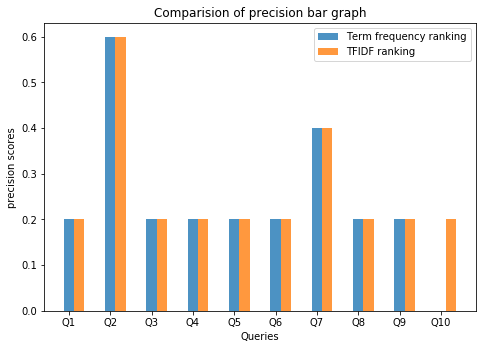

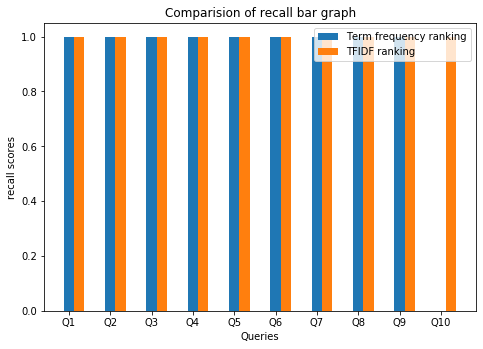

In [24]:
data = [fifth_level_precision,fifth_level_precision_tfidf]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0],alpha = 0.8, width = 0.25,label="Term frequency ranking")
ax.bar(X + 0.25, data[1],alpha = 0.8, width = 0.25,label="TFIDF ranking")
plt.title("Comparision of precision bar graph")
plt.xlabel("Queries")
plt.ylabel("precision scores")
labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
ax.set_xticks(X)
ax.set_xticklabels(labels)
plt.legend()
data = [fifth_level_recall,fifth_level_recall_tfidf]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.25,label="Term frequency ranking")
ax.bar(X + 0.25, data[1], width = 0.25,label="TFIDF ranking")
plt.title("Comparision of recall bar graph")
plt.xlabel("Queries")
plt.ylabel("recall scores")
plt.legend()
ax.set_xticks(X)
ax.set_xticklabels(labels)
print()

# TASK3

## K-means with Eucledian Distance
* k-means with eucleadian distance
* assuming k = 30 clusters
* assuming maximum iterations 200

In [25]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=30, max_iter=200,random_state=3425)

kmeans_model.fit(vectorized_data_docs)

clusters = kmeans_model.labels_.tolist()

print(clusters)

[8, 29, 7, 6, 8, 8, 19, 12, 20, 8, 8, 8, 8, 4, 9, 8, 1, 2, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 15, 8, 22, 0, 8, 27, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 25, 8, 17, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 11, 8, 8, 8, 8, 8, 8, 8, 8, 8, 26, 8, 8, 16, 8, 28, 8, 8, 8, 8, 21, 8, 8, 23, 8, 13, 8, 8, 8, 18, 3, 24, 8, 5]


## K-means with Cosine Similarity

* as Kmeans uses euclidian distance as the metric to make the clusters we normalized the vectors to make it equivalent to cosine similarity

In [26]:
from sklearn import preprocessing

X_Norm = preprocessing.normalize(vectorized_data_docs)

km2 = KMeans(n_clusters=30, max_iter=200, random_state=3425).fit(X_Norm)

clus = km2.labels_.tolist()

print(clus)

[1, 29, 15, 4, 27, 26, 1, 4, 1, 16, 4, 4, 29, 1, 16, 23, 15, 4, 4, 14, 10, 4, 21, 24, 4, 4, 4, 4, 11, 28, 23, 9, 2, 10, 4, 11, 17, 15, 8, 18, 1, 19, 4, 19, 0, 23, 4, 6, 4, 21, 8, 8, 6, 4, 20, 21, 22, 4, 3, 4, 4, 12, 18, 22, 22, 4, 22, 12, 22, 5, 22, 24, 6, 3, 6, 4, 29, 4, 18, 25, 2, 3, 29, 11, 29, 7, 4, 4, 29, 4, 4, 23, 4, 13, 7, 2, 4, 10, 2, 4, 4]


## Agglomerative clustering with SINGLE linkage

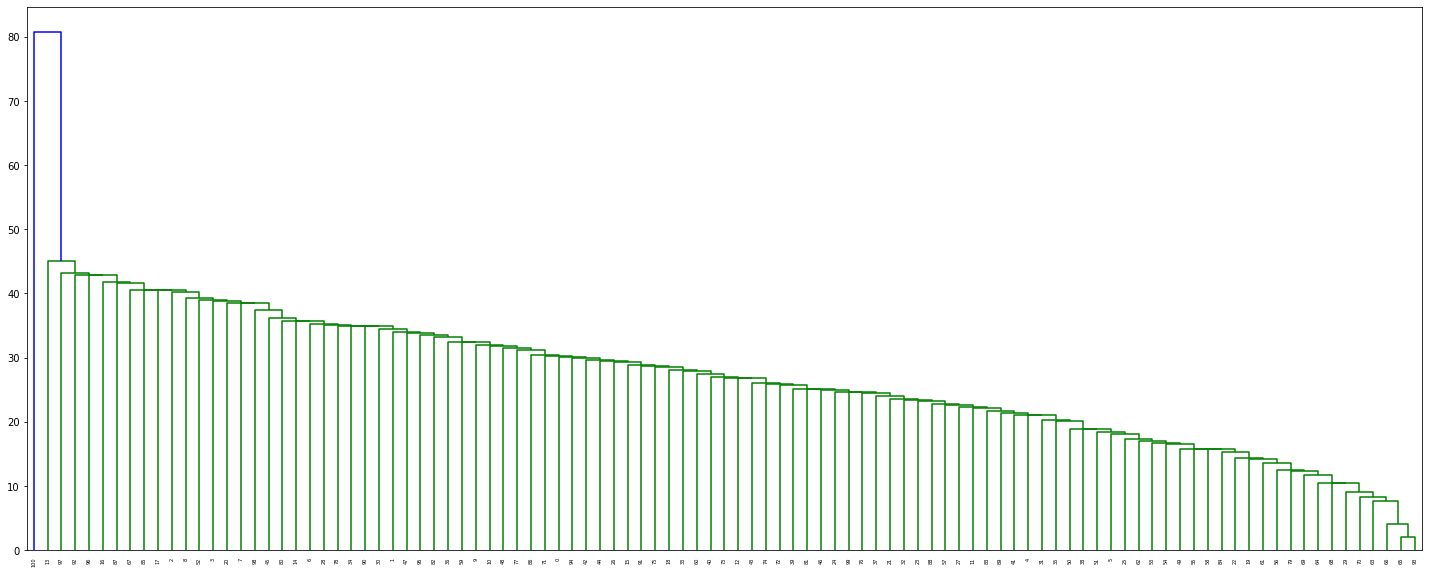

In [27]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectorized_data_docs, method='single', metric='euclidean')

fig = plt.figure(figsize=(25, 10))

dendrogram(Z) 

plt.show()

## Agglomerative clustering with COMPLETE linkage

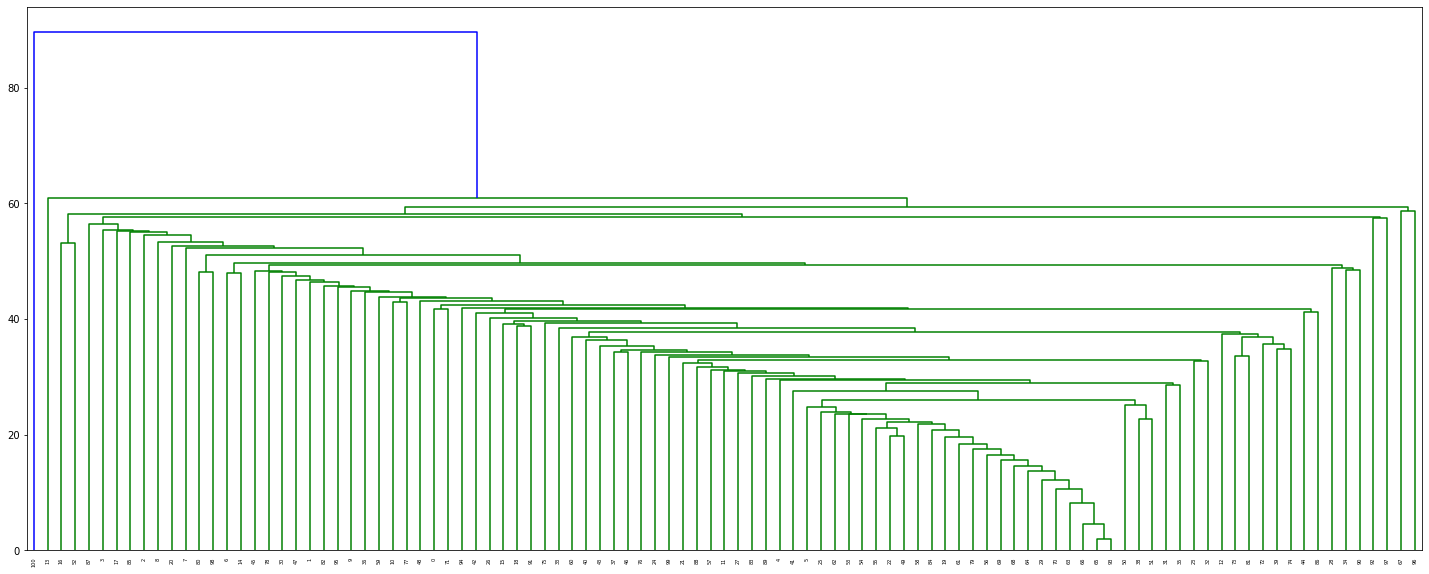

In [28]:
import matplotlib.pyplot as plt
Z = linkage(vectorized_data_docs, method='complete', metric='euclidean')

fig = plt.figure(figsize=(25, 10))

dendrogram(Z) 

plt.show()

## Agglomerative clustering with AVERAGE linkage

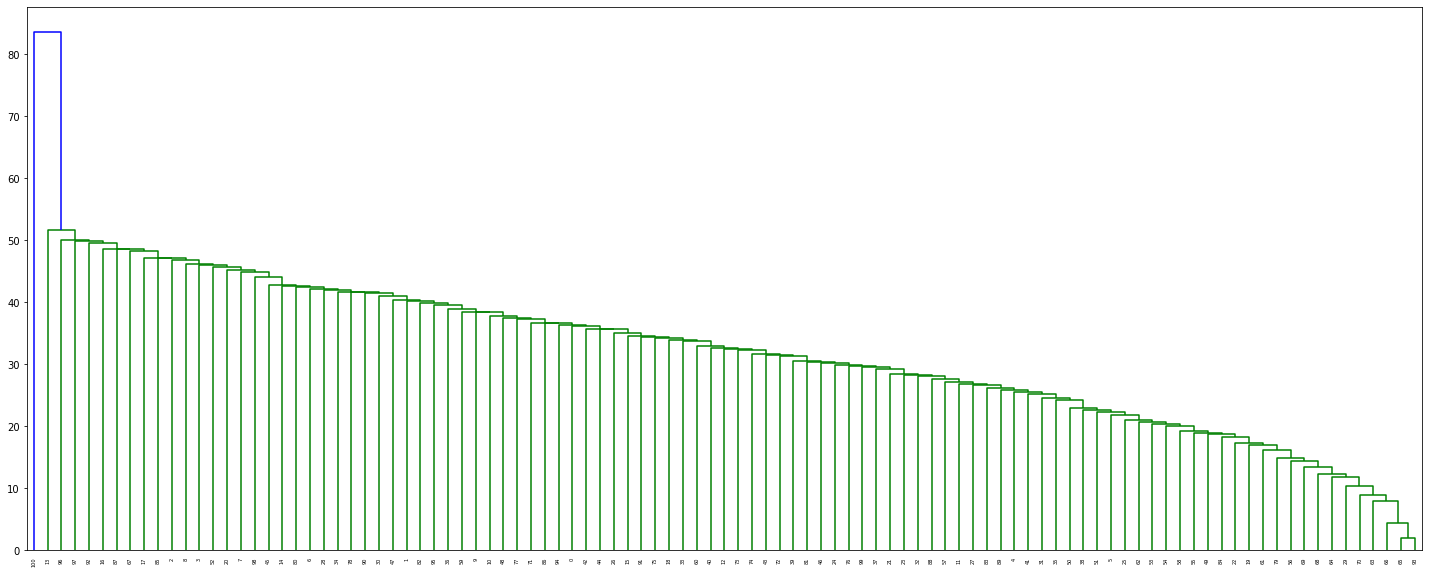

In [29]:
import matplotlib.pyplot as plt

Z = linkage(vectorized_data_docs, method='average', metric='euclidean')

fig = plt.figure(figsize=(25, 10))

dendrogram(Z) 

plt.show()

## Agglomerative clustering with WARD'S METHOD

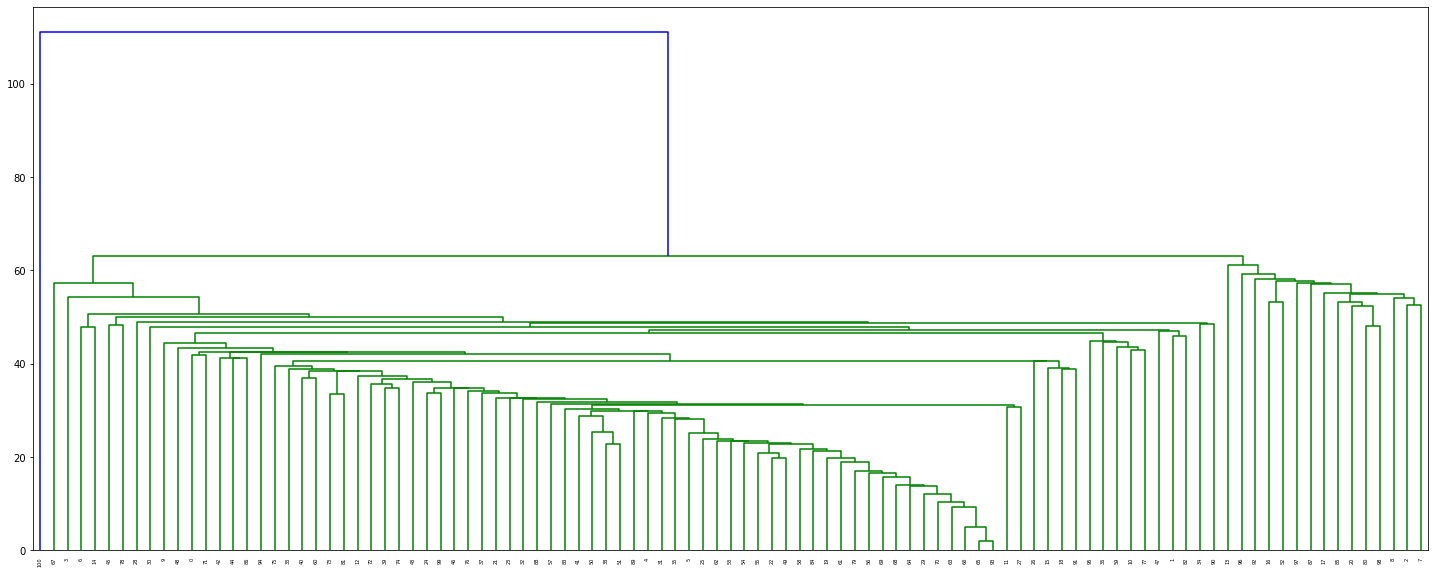

In [30]:
Z = linkage(vectorized_data_docs, method='ward', metric='euclidean')

fig = plt.figure(figsize=(25, 10))

dendrogram(Z) 

plt.show()

# TASK 4

* It will make a list according to label as the name and the list of documents in it

In [31]:
def packing_data_into_clusters(data):
    from collections import defaultdict
    clustered_data=defaultdict(list)
    for i in range(len(data)):
        clustered_data[data[i]].append(i+1)
    clustered_data=sorted(clustered_data.items())
    return clustered_data

* It calculates the cosine similarity when two vectors are passed to it.
* It returns the cosine similarity

In [32]:
def cos(vector1,vector2):
    dot = np.dot(vector1,vector2)
    norma = np.linalg.norm(vector1)
    normb = np.linalg.norm(vector2)
    if norma!=0 and normb !=0:
        cosi = dot / (norma * normb)
    else:
        cosi = 0
    return cosi

* Calculating the average intracluster values
* For every cluster there will be a average intracluster value and the average of all the intraclusters is the complete intracluster for a particular method/model.

In [93]:
def intracluster(cd):
    inter_cluster_similarity=[]
    for i in cd:
        s=0
        n=len(i[1])
        if n == 1:
            inter_cluster_similarity.append(1)
        else:
            for j in range(n):
                for k in range(j+1,n):
                    s=s+cos(vectorized_data_docs[i[1][j]-1],vectorized_data_docs[i[1][k]-1])
            inter_cluster_similarity.append(s/((n*(n-1))/2))
    return sum(inter_cluster_similarity)/len(cd)

* Calculating the intercluster values
* Intercluster values are calculated using centroids which is defined in the function

In [85]:
def centroid(document_ids):
    c=np.zeros(len(vectorized_data_docs[0]))
    for i in document_ids:
        for j in range(len(vectorized_data_docs[i-1])):
            c[j]=c[j]+vectorized_data_docs[i-1][j]
    for j in range(len(c)):
        c[j]=c[j]/len(document_ids)
    return c       
def intercluster(cd):
    centroid_dict={}
    for i in cd:
        centroid_dict[i[0]]=centroid(i[1])
    s=0
    for c1,v1 in centroid_dict.items():
        for c2,v2 in centroid_dict.items():
            s=s+cos(v1,v2)
    s=s/len(cd)**2
    return s

Plotting the graph of intra-similarity and inter-similarity values

In [109]:
xaxis=[]
for i in range(2,101):
    xaxis.append(i)
import matplotlib 
from pylab import rcParams
import matplotlib.pyplot as plt
    plt.figure(figsize=(25, 10))   
    matplotlib.rcParams.update({'font.size': 7})
def plotinter_intra(inter,intra):
    plt.plot(xaxis,inter)
    plt.xticks(xaxis)
    plt.ylabel('inter cluster')

    plt.show()
    plt.plot(xaxis,intra)
    plt.xticks(xaxis)
    plt.ylabel('intra cluster')

    plt.show()
    plt.plot(inter,intra)
    plt.xlabel("inter cluster")
    plt.ylabel('intra cluster')
  
    plt.show()

### The intra-similarity and inter-similarity measures are used as parameters for deciding best K.

### Different values of K are calculated starting from minimum and then increasing the value in each trial.

### By observing the graph and noticing the point when it starts behaving linearly, the best K is selected.



## Best k value for k means euclidean

#### The best K value is : 33

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

In [110]:
from sklearn import metrics

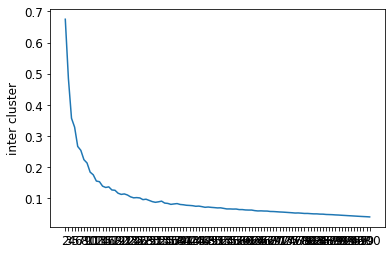

<Figure size 1800x720 with 0 Axes>

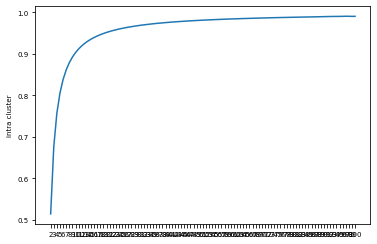

<Figure size 1800x720 with 0 Axes>

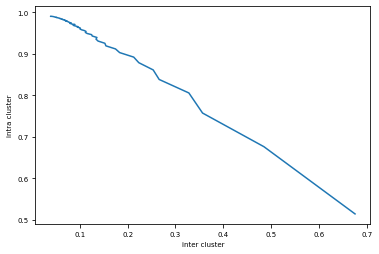

<Figure size 1800x720 with 0 Axes>

In [111]:
from sklearn.cluster import KMeans
result=[]
intra=[]
inter=[]
for i in range(2,101):
    kmeans_model = KMeans(n_clusters=i, max_iter=50,random_state=3425)
    kmeans_model.fit(vectorized_data_docs)
    clusters = kmeans_model.labels_.tolist()
    clusters = packing_data_into_clusters(clusters)
    a=intracluster(clusters)
    b=intercluster(clusters)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## Best K value for kmeans cosine similarity

#### The best K value is : 43

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

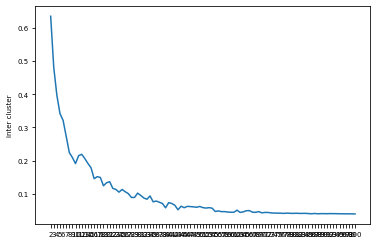

<Figure size 1800x720 with 0 Axes>

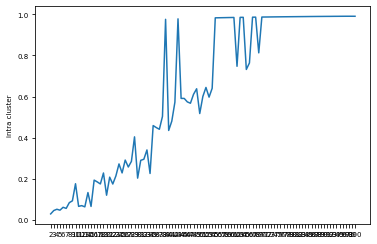

<Figure size 1800x720 with 0 Axes>

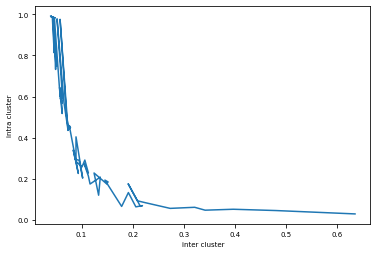

<Figure size 1800x720 with 0 Axes>

In [112]:
from sklearn import preprocessing 
result=[]
intra=[]
inter=[]
X_Norm = preprocessing.normalize(vectorized_data_docs)
for i in range(2,101):
    km2 = KMeans(n_clusters=i, max_iter=50, random_state=3221).fit(X_Norm)
    clus = km2.labels_.tolist()
    clus = packing_data_into_clusters(clus)
    a=intracluster(clus)
    b=intercluster(clus)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## Best K value for Agglomerative Single Linkage

#### The best K value is : 31

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

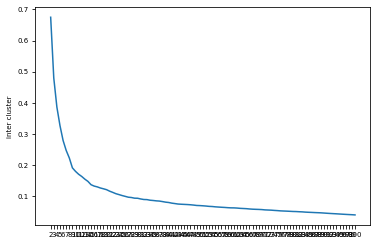

<Figure size 1800x720 with 0 Axes>

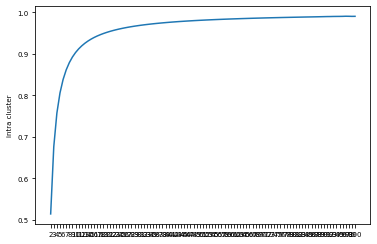

<Figure size 1800x720 with 0 Axes>

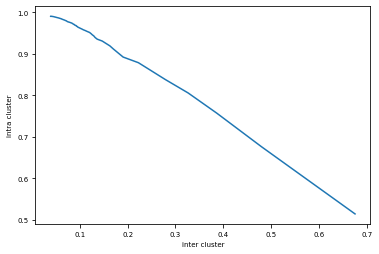

<Figure size 1800x720 with 0 Axes>

In [113]:
from sklearn.cluster import AgglomerativeClustering
result=[]
intra=[]
inter=[]
for i in range(2,101):
    cluster_single = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='single')
    cluster_single.fit_predict(vectorized_data_docs)
    clusters_single = cluster_single.labels_.tolist()
    clusters_single = packing_data_into_clusters(clusters_single)
    a=intracluster(clusters_single)
    b=intercluster(clusters_single)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## Best K value for Agglomerative Complete Linkage

#### The best K value is : 28

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

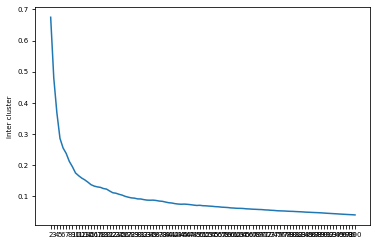

<Figure size 1800x720 with 0 Axes>

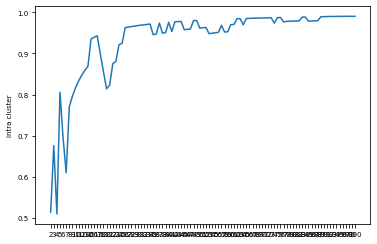

<Figure size 1800x720 with 0 Axes>

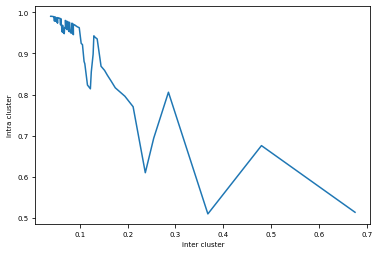

<Figure size 1800x720 with 0 Axes>

In [114]:
result=[]
intra=[]
inter=[]
for i in range(2,101):
    cluster_complete = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='complete')
    cluster_complete.fit_predict(vectorized_data_docs)
    clusters_complete = cluster_complete.labels_.tolist()
    clusters_complete = packing_data_into_clusters(clusters_complete)
    a=intracluster(clusters_complete)
    b=intercluster(clusters_complete)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## Best K value for Agglomerative Average Linkage

#### The best K value is : 30

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

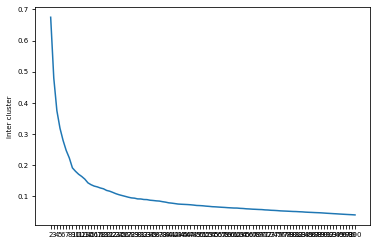

<Figure size 1800x720 with 0 Axes>

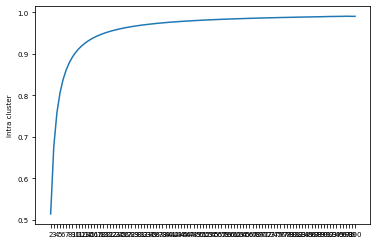

<Figure size 1800x720 with 0 Axes>

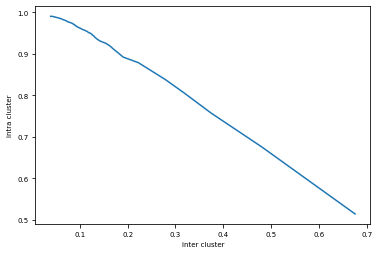

<Figure size 1800x720 with 0 Axes>

In [115]:
from sklearn.cluster import AgglomerativeClustering
result=[]
intra=[]
inter=[]
for i in range(2,101):
    cluster_average = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='average')
    cluster_average.fit_predict(vectorized_data_docs)
    clusters_average = cluster_average.labels_.tolist()
    clusters_average = packing_data_into_clusters(clusters_average)
    a=intracluster(clusters_average)
    b=intercluster(clusters_average)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## Best K value for Agglomerative Ward's Method

#### The best K value is : 37

* Plotting of values of K, cluster intra-similarity and inter-similarity combination values.
* The graph justifies the answer of selection of the best K.

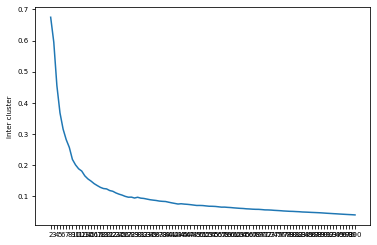

<Figure size 1800x720 with 0 Axes>

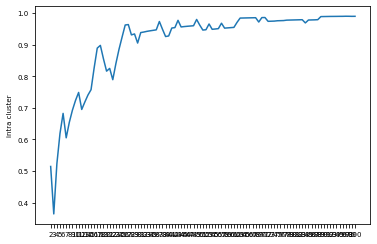

<Figure size 1800x720 with 0 Axes>

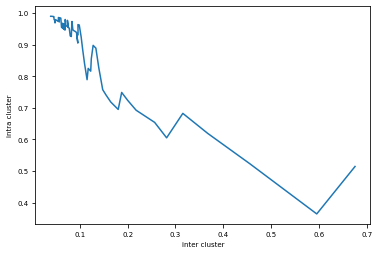

<Figure size 1800x720 with 0 Axes>

In [116]:
from sklearn.cluster import AgglomerativeClustering
result=[]
intra=[]
inter=[]
for i in range(2,101):
    cluster_ward = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='ward')
    cluster_ward.fit_predict(vectorized_data_docs)
    clusters_ward = cluster_ward.labels_.tolist()
    clusters_ward = packing_data_into_clusters(clusters_ward)
    a=intracluster(clusters_ward)
    b=intercluster(clusters_ward)
    intra.append(a)
    inter.append(b)
    #print("cluster",i,"\nintracluster similarity=",a,"\nintercluster similarity=",b)
plotinter_intra(inter,intra)

## TASK 5

#### Computation of precision and recall for each query is done on the dataset which is in the form of clusters

* Plotting function for plotting precision and recall

In [117]:
def plot_precision_recall(precision,recall,s):
    data = [precision_with_ranking_tfidf,precision]
    X = np.arange(10)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b',alpha = 0.8, width = 0.25,label="TFIDF ranking")
    ax.bar(X + 0.25, data[1], color = 'g',alpha = 0.8, width = 0.25,label=s)
    plt.title("Comparision of precision bar graph")
    plt.xlabel("Queries")
    plt.ylabel("precision scores")
    labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
    ax.set_xticks(X)
    ax.set_xticklabels(labels)
    plt.legend()
    data = [recall_with_ranking_tfidf,recall]
    X = np.arange(10)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b',alpha = 0.8, width = 0.25,label="TFIDF ranking")
    ax.bar(X + 0.25, data[1], color = 'g',alpha = 0.8, width = 0.25,label=s)
    plt.title("Comparision of recall bar graph")
    plt.xlabel("Queries")
    plt.ylabel("recall scores")
    labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
    ax.set_xticks(X)
    ax.set_xticklabels(labels)
    plt.legend()

### Queries on kmeans with euclidean distance
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

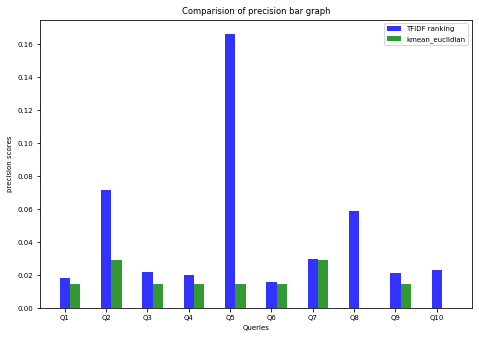

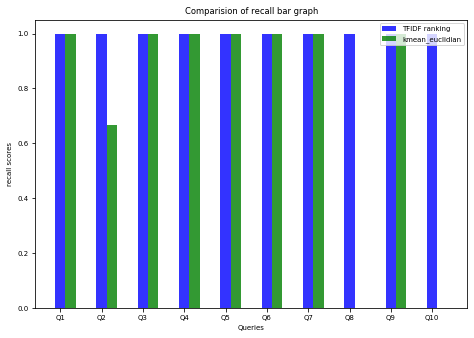

In [118]:
kmeans_model = KMeans(n_clusters=33, max_iter=200,random_state=3425)
kmeans_model.fit(vectorized_data_docs)
cluster1 = kmeans_model.labels_.tolist()
clus1=packing_data_into_clusters(cluster1)
count=1
precision=[]
recall=[]
for q in querys:
    x=tfidf_vectorizer.transform([q])
    pred = kmeans_model.predict(x.toarray())
    for i in clus1:
        if i[0] ==pred:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"kmean_euclidian")

### Queries on kmeans with cosine similarity
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

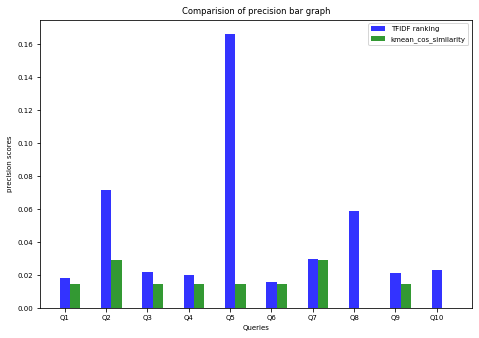

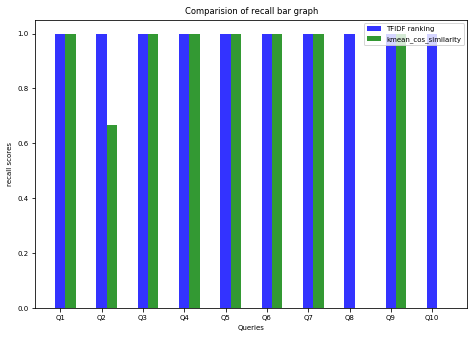

In [119]:
km2 = KMeans(n_clusters=43, max_iter=200, random_state=3221).fit(X_Norm)
clus = km2.labels_.tolist()
clus = kmeans_model.labels_.tolist()
clus1=packing_data_into_clusters(clus)
count=1
precision=[]
recall=[]
for q in querys:
    x=tfidf_vectorizer.transform([q])
    pred = kmeans_model.predict(x.toarray())
    for i in clus1:
        if i[0] ==pred:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"kmean_cos_similarity")

### Queries on Agglomerative Clustering with Single linkage
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

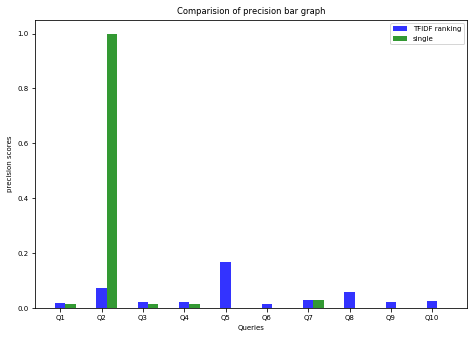

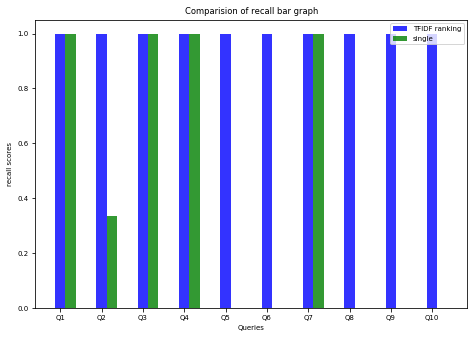

In [120]:
from sklearn.cluster import AgglomerativeClustering
cluster_single = AgglomerativeClustering(n_clusters=31, affinity='euclidean',linkage='single')
cluster_single.fit_predict(vectorized_data_docs)
clusters_single = cluster_single.labels_.tolist()
clusters_single_dict=packing_data_into_clusters(clusters_single)
centroid_single=[]
precision=[]
recall=[]
for i in clusters_single_dict:
    centroid_single.append(centroid(i[1]))
count=1
for q in vectorized_data_queries:
    cos_single=[]
    for i in range(len(centroid_single)):
        cos_single.append(cos(centroid_single[i],q))
    index=cos_single.index(max(cos_single))
    for i in clusters_single_dict:
        if i[0] == index:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"single")

### Queries on Agglomerative Clustering with Complete linkage
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

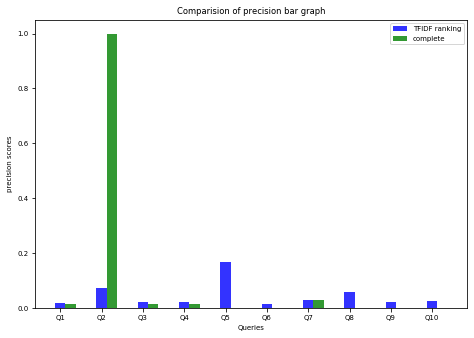

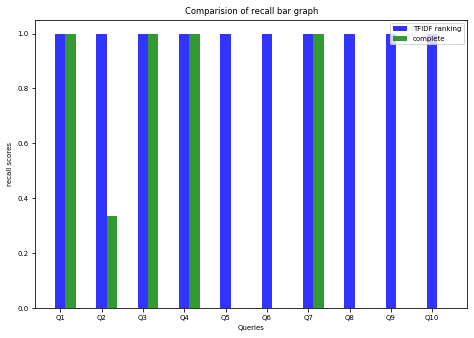

In [121]:
cluster_single = AgglomerativeClustering(n_clusters=28, affinity='euclidean',linkage='complete')
cluster_single.fit_predict(vectorized_data_docs)
clusters_single = cluster_single.labels_.tolist()
clusters_single_dict=packing_data_into_clusters(clusters_single)
centroid_single=[]
precision=[]
recall=[]
for i in clusters_single_dict:
    centroid_single.append(centroid(i[1]))
count=1
for q in vectorized_data_queries:
    cos_single=[]
    for i in range(len(centroid_single)):
        cos_single.append(cos(centroid_single[i],q))
    index=cos_single.index(max(cos_single))
    for i in clusters_single_dict:
        if i[0] == index:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"complete")

### Queries on Agglomerative Clustering with Average linkage
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

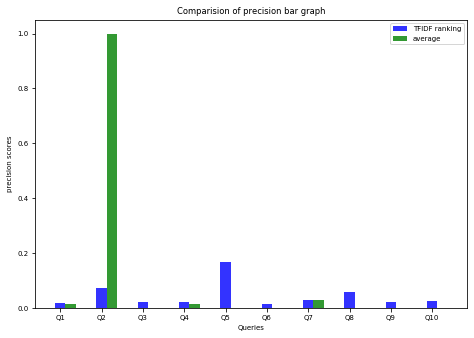

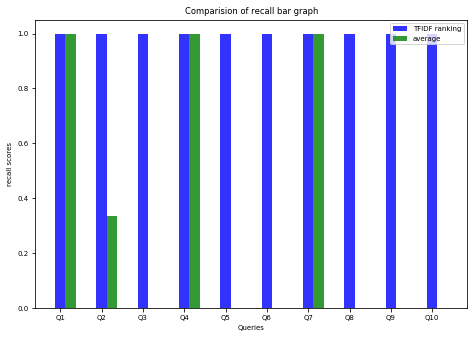

In [122]:
cluster_single = AgglomerativeClustering(n_clusters=30, affinity='euclidean',linkage='average')
cluster_single.fit_predict(vectorized_data_docs)
clusters_single = cluster_single.labels_.tolist()
clusters_single_dict=packing_data_into_clusters(clusters_single)
centroid_single=[]
precision=[]
recall=[]
for i in clusters_single_dict:
    centroid_single.append(centroid(i[1]))
count=1
for q in vectorized_data_queries:
    cos_single=[]
    for i in range(len(centroid_single)):
        cos_single.append(cos(centroid_single[i],q))
    index=cos_single.index(max(cos_single))
    for i in clusters_single_dict:
        if i[0] == index:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"average")

### Queries on Agglomerative Clustering with Ward's Method
#### Precison and Recall for each query is calculated and the results are compared with the Precision and Recall values of Task 2.

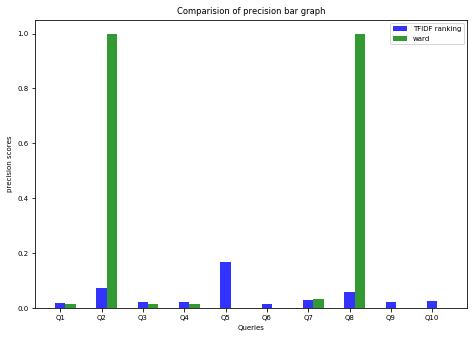

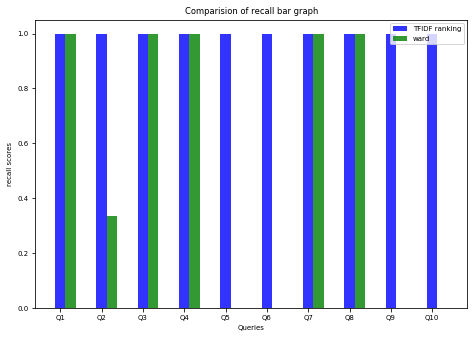

In [123]:
cluster_single = AgglomerativeClustering(n_clusters=37, affinity='euclidean',linkage='ward')
cluster_single.fit_predict(vectorized_data_docs)
clusters_single = cluster_single.labels_.tolist()
clusters_single_dict=packing_data_into_clusters(clusters_single)
centroid_single=[]
precision=[]
recall=[]
for i in clusters_single_dict:
    centroid_single.append(centroid(i[1]))
count=1
for q in vectorized_data_queries:
    cos_single=[]
    for i in range(len(centroid_single)):
        cos_single.append(cos(centroid_single[i],q))
    index=cos_single.index(max(cos_single))
    for i in clusters_single_dict:
        if i[0] == index:            
            retrieved=len(i[1])
            relevant_retrived=0
            for j in relevant_documents_id[count-1]:
                if j in i[1]:
                    relevant_retrived+=1
    precision.append(relevant_retrived/retrieved)
    recall.append(relevant_retrived/len(relevant_documents_id[count-1]))
    count+=1
plot_precision_recall(precision,recall,"ward")